# MFDFA on real/fake/shuffle_intergap

In [1]:
from starling_rhythm.utils.paths import PROCESSED_DIR, ensure_dir
import pandas as pd

In [2]:
FAKE_SONG_DIR = PROCESSED_DIR / 'fake_songs'
FAKE_SONG_DIR

PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/fake_songs')

## let's just focus on bout 0

In [3]:
from pathlib2 import Path

In [4]:
import scipy.io.wavfile
from starling_rhythm.utils.audio import extract_amp_env
from tqdm.autonotebook import tqdm

/home/AD/j8xing/anaconda3/envs/starling_rhythm/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [53]:
def fake_song_parser(bout_nb):
    '''
    Take wav_paths of fake songs, retrieve ID and audio
    '''
    
    BOUT_DIR = FAKE_SONG_DIR / ('bout_' + str(bout_nb))
    
    wav_paths = list(Path(BOUT_DIR).rglob("*.wav"))
    
    bout_nbs = []
    strts = []
    ends = []
    song_types = []
    waveforms = []
    sampling_rates = []
    log_amp_envs = []
    
    for wav_path in tqdm(wav_paths, desc = 'Processing wavs'):
    
        wav_path = str(wav_path)

        bout_nbs.append(int(wav_path.split('/')[7].split('_')[1]))
        strts.append(int(float(wav_path.split('/')[8].split('-')[0])))
        ends.append(int(float(wav_path.split('/')[8].split('-')[1])))
        song_types.append(wav_path.split('/')[9])
        waveform = scipy.io.wavfile.read(wav_path)[1].astype(int)
        waveforms.append(waveform)
        sampling_rate = scipy.io.wavfile.read(wav_path)[0]
        sampling_rates.append(sampling_rate)
        
                          
        log_amp_envs.append(extract_amp_env(
            data = waveform, 
            target_sr = 200, 
            win_type = 'boxcar', 
            res_type = 'linear',
            stds = 1,
            buffer = 100,
            spl = True
        ))
    
    fake_df = pd.DataFrame(
        {
            'bout_nb': bout_nbs,
            'strt': strts,
            'end': ends,
            'song_type': song_types,
            'waveform': waveforms,
            'log_amp_env': log_amp_envs
        }
    )
    
    return fake_df

In [54]:
df_0 = fake_song_parser(0)

Processing wavs: 100%|██████████| 160/160 [00:59<00:00,  2.70it/s]


## visualize 10-20

In [169]:
import numpy as np
import matplotlib.pyplot as plt

In [313]:
strt = np.unique(df_0.strt)[4]

In [314]:
df_0_10 = df_0[df_0.strt == strt]

### Real

In [315]:
real_0_10 = df_0_10[df_0_10.song_type == 'real_syn']

In [316]:
real_0_10

bout_nb  strt  end song_type  \
64        0    45   55  real_syn   

                                             waveform  \
64  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                          log_amp_env  
64  [0.012671856982144698, 14.05406257219971, 26.6...

/home/AD/j8xing/anaconda3/envs/starling_rhythm/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7628: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


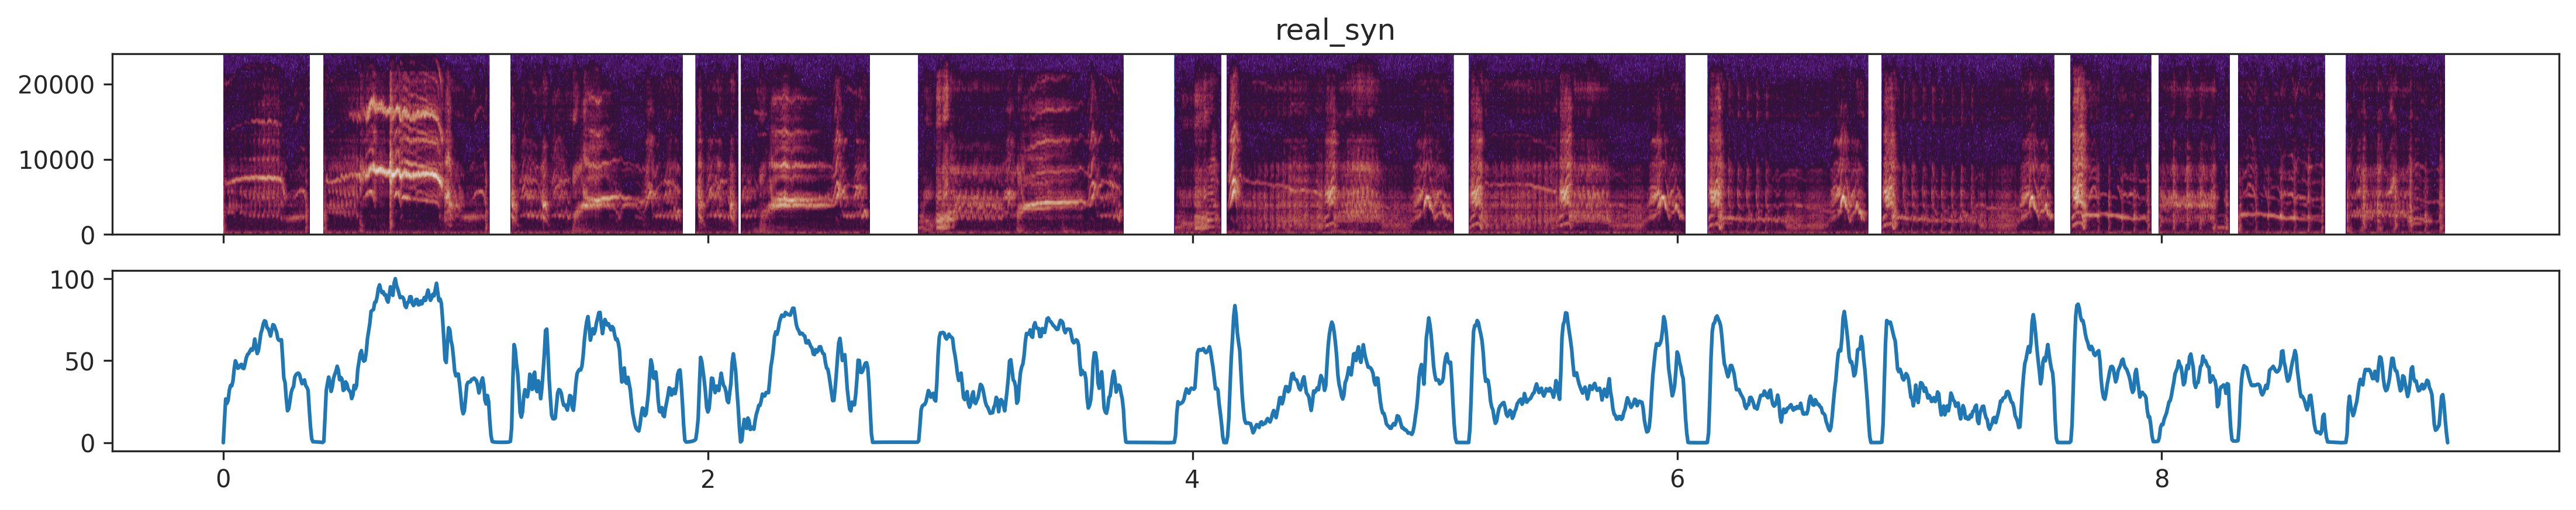

In [317]:
fig, axs = plt.subplots(2, sharex = True, figsize=(18, 3), dpi=300)
axs[0].title.set_text('real_syn')
axs[0].specgram(real_0_10.waveform.values[0], Fs = 48000, cmap = 'twilight')
axs[1].plot(np.arange(0, len(real_0_10.log_amp_env.values[0])/200, step = 0.005), real_0_10.log_amp_env.values[0])

### Fake

In [318]:
fake_0_10 = df_0_10[df_0_10.song_type == 'fake_syn']

In [319]:
fake_0_10

bout_nb  strt  end song_type  \
95        0    45   55  fake_syn   

                                             waveform  \
95  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                          log_amp_env  
95  [0.012125573276387231, 13.753834076418473, 26....

/home/AD/j8xing/anaconda3/envs/starling_rhythm/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7628: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


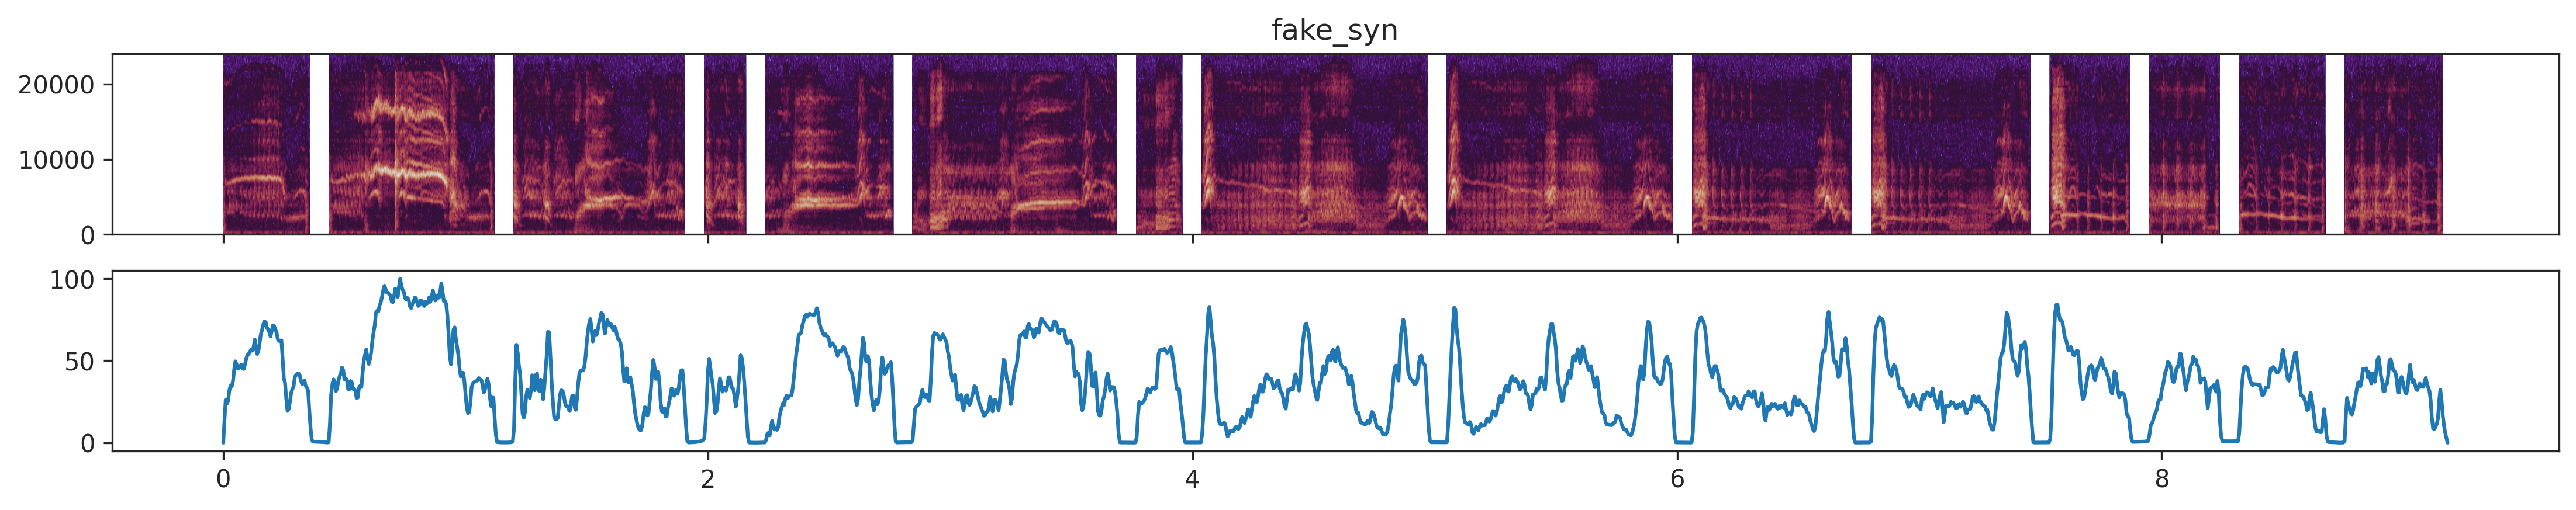

In [320]:
fig, axs = plt.subplots(2, sharex = True, figsize=(18, 3), dpi=300)
axs[0].title.set_text('fake_syn')
axs[0].specgram(fake_0_10.waveform.values[0], Fs = 48000, cmap = 'twilight')
axs[1].plot(np.arange(0, len(fake_0_10.log_amp_env.values[0])/200, step = 0.005), fake_0_10.log_amp_env.values[0])

### Shuffle intergap

In [321]:
si_0_10 = df_0_10[df_0_10.song_type == 'shuffle_intergap']

In [322]:
si_0_10.head(2)

bout_nb  strt  end         song_type  \
65        0    45   55  shuffle_intergap   
66        0    45   55  shuffle_intergap   

                                             waveform  \
65  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
66  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                          log_amp_env  
65  [0.014838647215545904, 13.930705168286089, 26....  
66  [0.01487106858861892, 13.78335763302531, 26.23...

In [323]:
num = 2

/home/AD/j8xing/anaconda3/envs/starling_rhythm/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7628: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


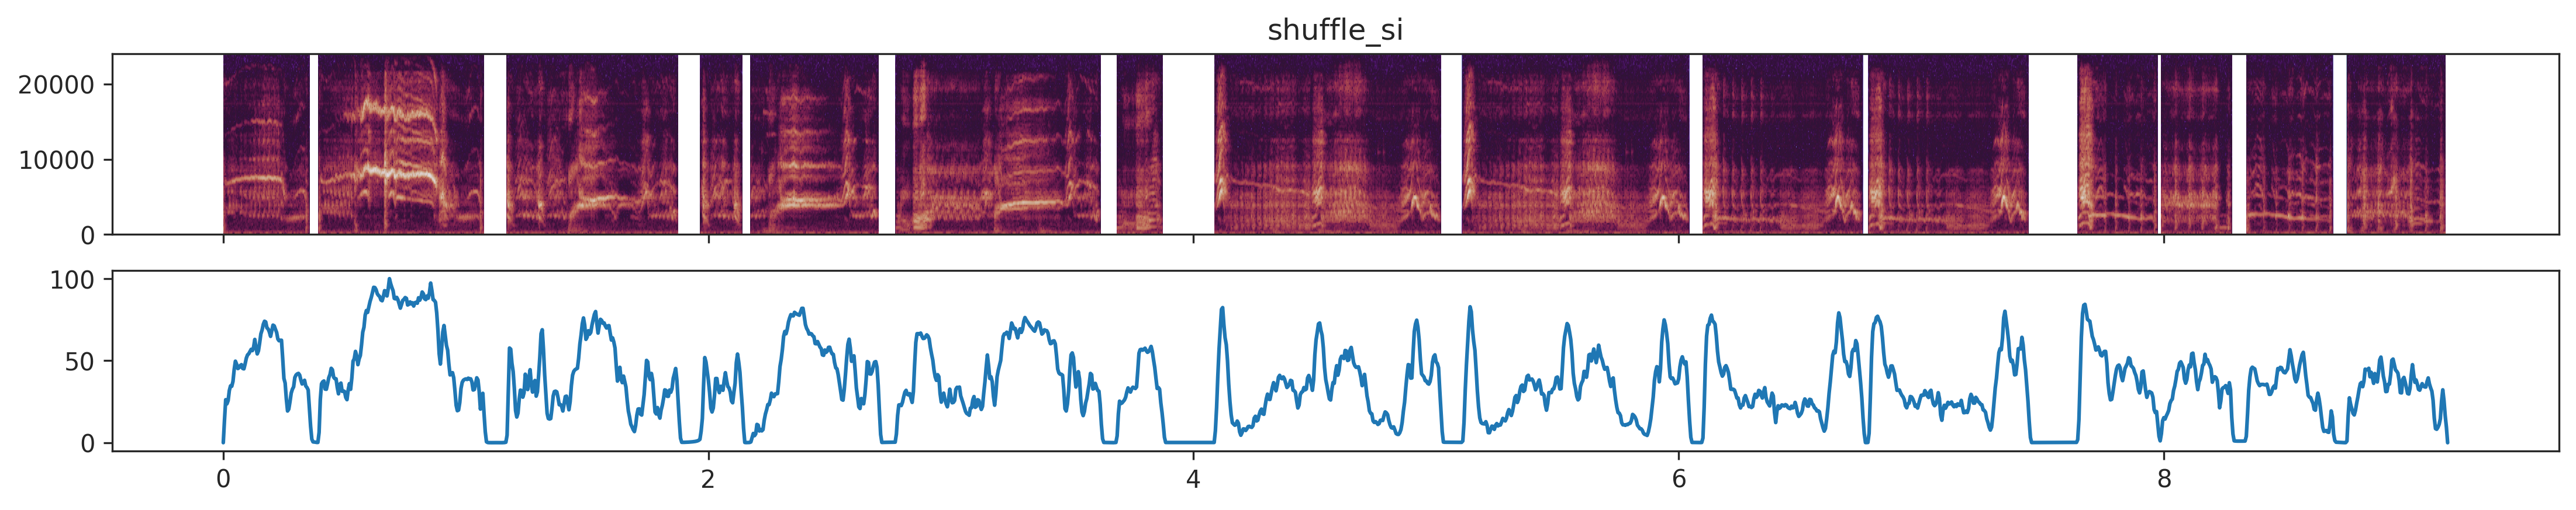

In [324]:
fig, axs = plt.subplots(2, sharex = True, figsize=(18, 3), dpi=300)
axs[0].title.set_text('shuffle_si')
axs[0].specgram(si_0_10.waveform.values[num], Fs = 48000, cmap = 'twilight')
axs[1].plot(np.arange(0, len(si_0_10.log_amp_env.values[num])/200, step = 0.005), si_0_10.log_amp_env.values[num])

## Calculate $t_{MF}$

In [325]:
import numpy as np
from starling_rhythm.mfdfa import hurst_expo
from joblib import Parallel, delayed
from tqdm.autonotebook import tqdm

n_jobs = 36 ## set up joblib parameters
verbose = 0

In [326]:
with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    h_expos = parallel(
        delayed(hurst_expo)(
            amp_env
        ) 
        for amp_env in tqdm(df_0_10.log_amp_env.values, desc = "Retrieving Hurst Exponents for all Amplitude Envelopes.")
    )

Retrieving Hurst Exponents for all Amplitude Envelopes.: 100%|██████████| 32/32 [00:00<00:00, 82748.29it/s]


In [327]:
MF_range = []
for h_expo in h_expos:
    MF_range.append(max(h_expo) - min(h_expo))

In [328]:
df_0_10['MF_range'] = MF_range

/tmp/ipykernel_27992/1436783147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0_10['MF_range'] = MF_range


In [329]:
import starling_rhythm.iaaft as iaaft
from starling_rhythm.mfdfa import hurst_expo
from joblib import Parallel, delayed
from timeit import timeit
from tqdm.autonotebook import tqdm

In [330]:
def SDoMF_iaaft(amp_env, ns = 32):
    '''
    For each amplitude envelope, find some number of its surrogates, and find MF_range for all surrogates
    '''
    
    ## calculate its surrogates
    surrogates = iaaft.surrogates(amp_env, ns = ns, maxiter = 10000, verbose = False)
    
    ## container for SDoMF_iaaft
    SDoMF = []
    
    ## find all the Hurst exponents of all the surrogates
    for surrogate in surrogates:
        ## Output Hs for each surrogate
        h_expos = hurst_expo(surrogate)
        SDoMF.append(max(h_expos) - min(h_expos))
            
    return SDoMF

In [331]:
with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    mf_ranges = parallel(
        delayed(SDoMF_iaaft)(
            amp_env
        )
        for amp_env in tqdm(df_0_10.log_amp_env.values, desc = 'Running Surrogate Data')
    )

Running Surrogate Data: 100%|██████████| 32/32 [00:00<00:00, 59520.06it/s]


In [332]:
df_0_10['mf_iaaft_range'] = mf_ranges

/tmp/ipykernel_27992/2022839664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0_10['mf_iaaft_range'] = mf_ranges


In [333]:
import scipy.stats as stats
import numpy as np

In [334]:
ts = []
p = []
for MF_range, mf_iaaft_range in zip(df_0_10['MF_range'].values, df_0_10['mf_iaaft_range']):
    test = stats.ttest_1samp(mf_iaaft_range, MF_range)
    ts.append(test[0])
    p.append(test[1])
    
df_0_10['ts'] = ts
df_0_10['p'] = p

/tmp/ipykernel_27992/3383150866.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0_10['ts'] = ts
/tmp/ipykernel_27992/3383150866.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0_10['p'] = p


In [335]:
df_0_10

bout_nb  strt  end         song_type  \
64        0    45   55          real_syn   
65        0    45   55  shuffle_intergap   
66        0    45   55  shuffle_intergap   
67        0    45   55  shuffle_intergap   
68        0    45   55  shuffle_intergap   
69        0    45   55  shuffle_intergap   
70        0    45   55  shuffle_intergap   
71        0    45   55  shuffle_intergap   
72        0    45   55  shuffle_intergap   
73        0    45   55  shuffle_intergap   
74        0    45   55  shuffle_intergap   
75        0    45   55  shuffle_intergap   
76        0    45   55  shuffle_intergap   
77        0    45   55  shuffle_intergap   
78        0    45   55  shuffle_intergap   
79        0    45   55  shuffle_intergap   
80        0    45   55  shuffle_intergap   
81        0    45   55  shuffle_intergap   
82        0    45   55  shuffle_intergap   
83        0    45   55  shuffle_intergap   
84        0    45   55  shuffle_intergap   
85        0    45   55  shuffle_intergap   
86        0    45   55  shuffle_intergap   
87        0    45   55  shuffle_intergap   
88        0    45   55  shuffle_intergap   
89        0    45   55  shuffle_intergap   
90        0    45   55  shuffle_intergap   
91        0    45   55  shuffle_intergap   
92        0    45   55  shuffle_intergap   
93        0    45   55  shuffle_intergap   
94        0    45   55  shuffle_intergap   
95        0    45   55          fake_syn   

                                             waveform  \
64  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
65  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
66  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
67  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
68  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
69  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
70  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
71  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
72  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
73  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
74  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
75  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
76  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
77  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
78  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
79  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
80  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
81  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
82  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
83  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
84  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
85  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
86  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
87  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
88  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
89  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
90  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
91  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
92  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
93  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
94  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
95  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                          log_amp_env  MF_range  \
64  [0.012671856982144698, 14.05406257219971, 26.6...  0.152793   
65  [0.014838647215545904, 13.930705168286089, 26....  0.148338   
66  [0.01487106858861892, 13.78335763302531, 26.23...  0.146802   
67  [0.014633752647444924, 13.777300590996514, 26....  0.159621   
68  [0.014942737713842741, 13.941794005347049, 26....  0.169607   
69  [0.015086136904894114, 13.973724120409553, 26....  0.163708   
70  [0.01440341581100447, 13.760545980646565, 26.1...  0.176242   
71  [0.01503233705724287, 13.776102592962724, 26.1...  0.187250   
72  [0.01552685245771918, 14.041707970928776, 26.8...  0.161981   

<AxesSubplot:xlabel='ts', ylabel='Density'>

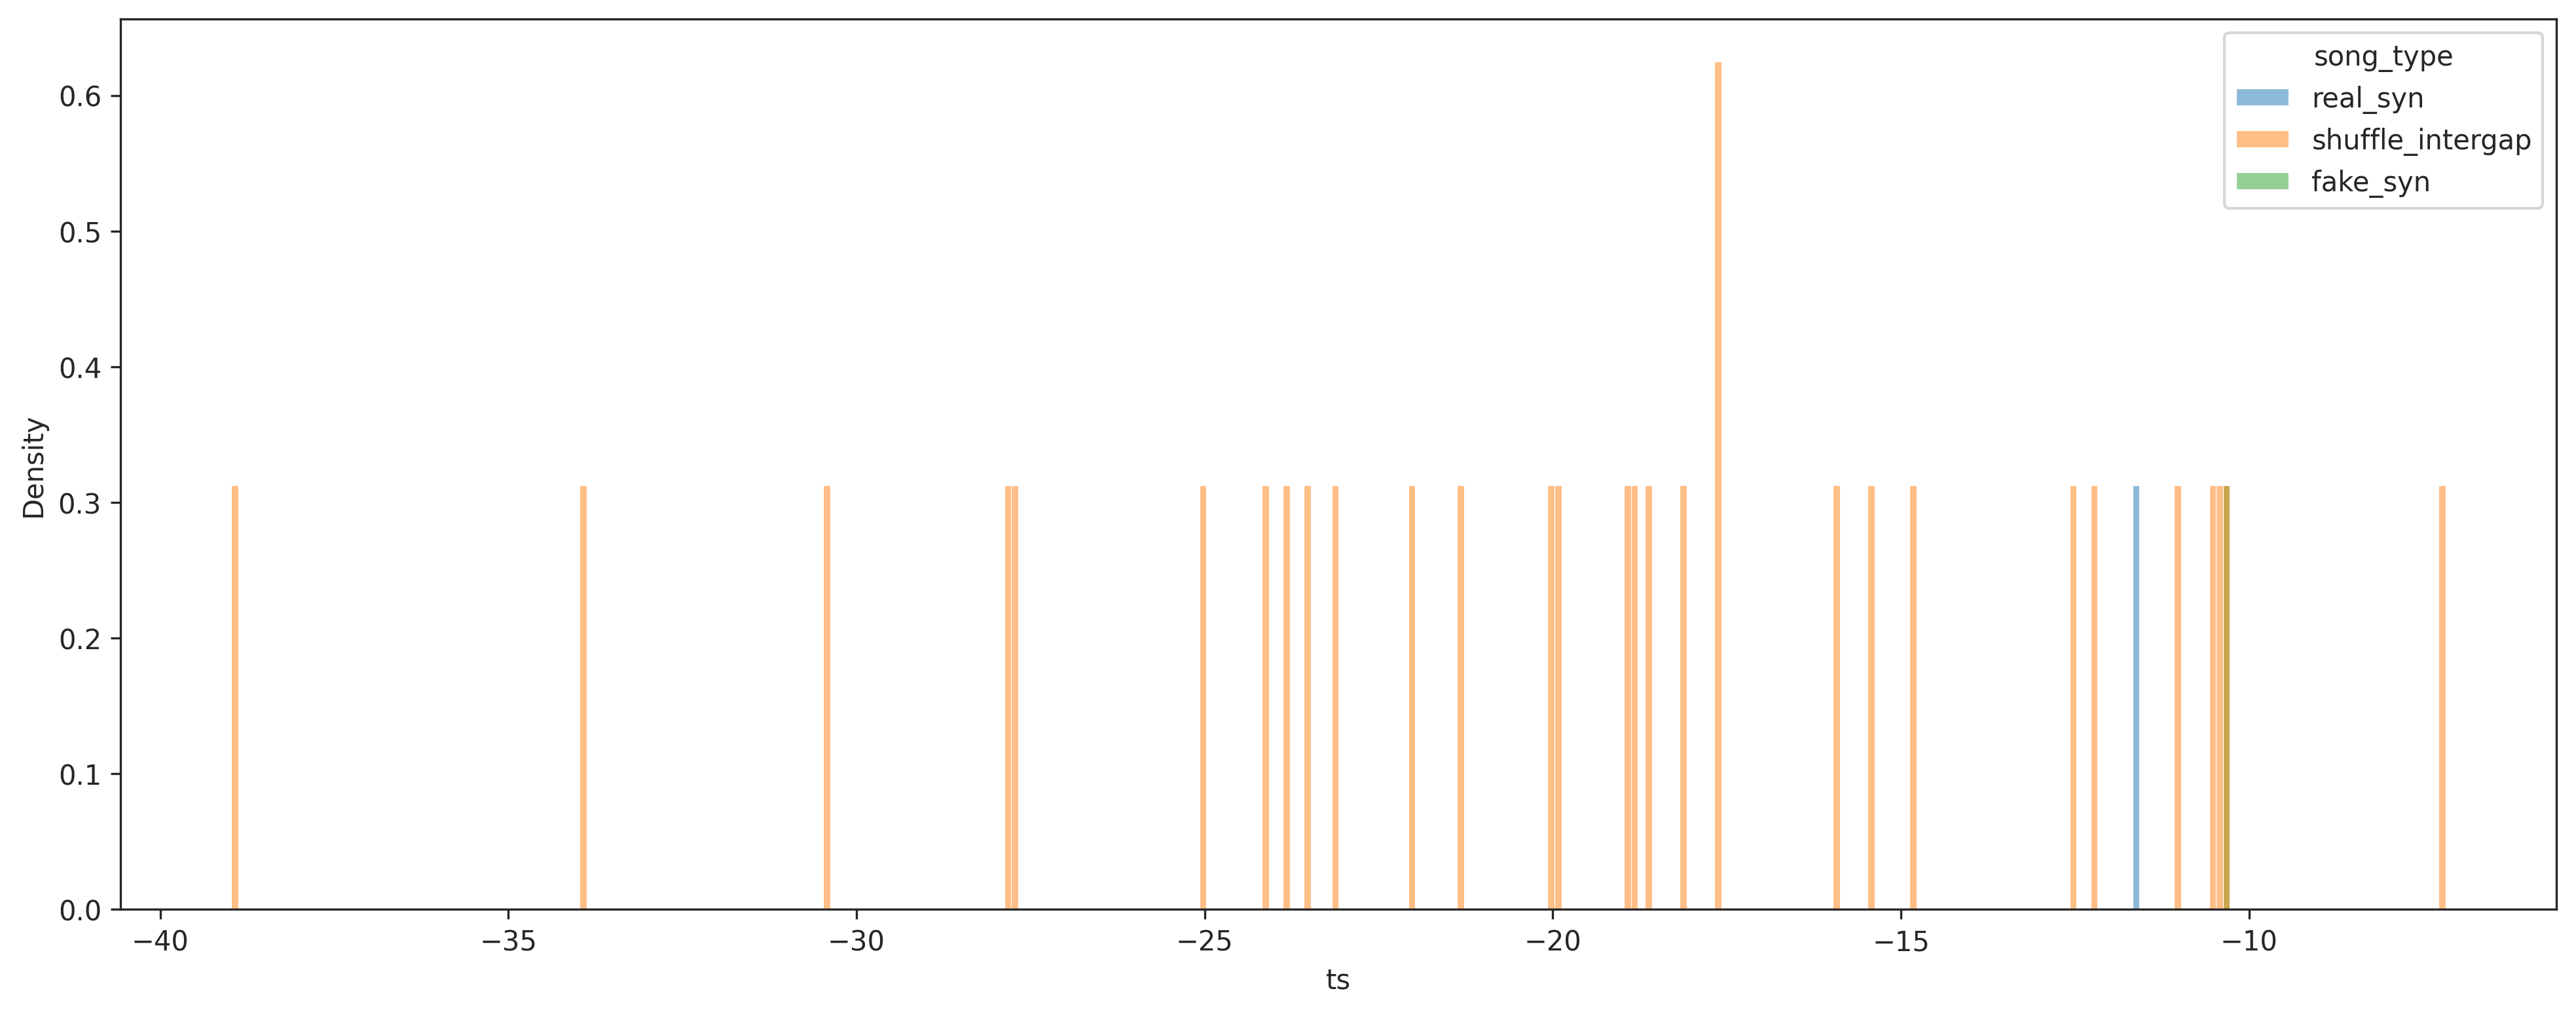

In [336]:
### distribution?
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['patch.edgecolor'] = 'none'
figure(figsize = (16, 6), dpi = 300)
sns.set_style('ticks')

sns.histplot(data = df_0_10, x = 'ts', stat = 'density', hue = 'song_type', binwidth = 0.1)